In [34]:
import pandas as pd

import matplotlib.pyplot as plt

In [35]:
used_columns=['permit_type',
              'review_type',
              'application_start_date',
              'processing_time',
#              'building_fee_paid',
#              'zoning_fee_paid',
#              'other_fee_paid',
#              'subtotal_paid',
#              'building_fee_unpaid',
#              'zoning_fee_unpaid',
#              'other_fee_unpaid',
#              'subtotal_unpaid',
#              'building_fee_waived',
#              'zoning_fee_waived',
#              'other_fee_waived',
#              'subtotal_waived',
              'total_fee',
              'reported_cost',
              'community_area',
#              'census_tract',
#              'ward',
              'latitude',
              'longitude',
              'location'
             ]


# Fetch small data set
#permit_df = pd.read_json("https://data.cityofchicago.org/resource/building-permits.json")
# Store small data set in csv
#permit_df.to_csv('building-permits-small.csv', index=False)
# Open csv and only keep useful columns
#permit_df= pd.read_csv('building-permits-small.csv', usecols=used_columns)

# Change small letters to capitals (json had lower case column labels)
used_columns=[string.upper() for string in used_columns]

permit_df= pd.read_csv('Building_Permits.csv', usecols=used_columns)

# Change upper case column labels in data frame back to lower case.

permit_df.columns = map(str.lower, permit_df.columns)

In [36]:
permit_df.head()

,permit_type,review_type,application_start_date,processing_time,total_fee,reported_cost,community_area,latitude,longitude,location
0,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,10/25/2007,0.0,65.0,0.0,NaN,NaN,NaN,NaN
1,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,07/28/2010,0.0,50.0,1000.0,30.0,NaN,NaN,NaN
2,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,01/08/2020,0.0,1500.0,1000.0,32.0,41.879597,-87.633615,POINT (-87.633614523166 41.879596931706)
3,PERMIT - ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,01/08/2020,0.0,150.0,20912.0,75.0,41.678426,-87.684266,POINT (-87.684265812189 41.678426244143)
4,PERMIT - SIGNS,SIGN PERMIT,03/29/2019,108.0,400.0,7500.0,32.0,41.878543,-87.632121,POINT (-87.632120576746 41.87854293164)


## Data cleaning

In [44]:
permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data set.")

# Remove any rows with empty application_start_date

permit_df = permit_df[pd.notnull(permit_df['application_start_date'])]

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date.")

# Remove any rows with empty community_area and convert to integers

permit_df = permit_df[pd.notnull(permit_df['community_area'])]

permit_df['community_area']=permit_df['community_area'].astype('int')

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date and nonempty community area.")

# Remove any rows with nonexistant community_area 0

permit_df = permit_df[permit_df['community_area']!=0]

permit_df_shape=permit_df.shape

print(f"There are {permit_df_shape[0]} total permits in data with nonempty start date and nonzero, nonempty community area.")

# Fixing date format

permit_df['application_start_date']=pd.to_datetime(permit_df['application_start_date'])

# Add a start_month column

permit_df['start_month'] = permit_df['application_start_date'].dt.month

# Remove "permit - " text frome each permit type.

permit_df['permit_type'] = permit_df['permit_type'].map(lambda x: x.replace('PERMIT - ', '', 1))

# Dictionary for later use

community_areas_dict = {}
with open('data/community_areas_dict') as f:
    for line in f:
        (key, val) = line.rstrip("\n").split(";")
        community_areas_dict[int(key)] = val
        
permit_df.head()

There are 507818 total permits in data set.
There are 507818 total permits in data with nonempty start date.
There are 507818 total permits in data with nonempty start date and nonempty community area.
There are 507818 total permits in data with nonempty start date and nonzero, nonempty community area.


,permit_type,review_type,application_start_date,processing_time,total_fee,reported_cost,community_area,latitude,longitude,location,start_month
1,ELECTRIC WIRING,EASY PERMIT WEB,2010-07-28,0.0,50.0,1000.0,30,NaN,NaN,NaN,7
2,ELECTRIC WIRING,EASY PERMIT WEB,2020-01-08,0.0,1500.0,1000.0,32,41.879597,-87.633615,POINT (-87.633614523166 41.879596931706),1
3,ELEVATOR EQUIPMENT,CONVEYANCE DEVICE PERMIT,2020-01-08,0.0,150.0,20912.0,75,41.678426,-87.684266,POINT (-87.684265812189 41.678426244143),1
4,SIGNS,SIGN PERMIT,2019-03-29,108.0,400.0,7500.0,32,41.878543,-87.632121,POINT (-87.632120576746 41.87854293164),3
5,ELECTRIC WIRING,EASY PERMIT WEB,2019-10-03,0.0,450.0,100.0,28,41.886739,-87.660158,POINT (-87.660157707246 41.88673894982),10


In [45]:
# How many sign are there?
sign_permit_df=permit_df[permit_df['permit_type']=='PERMIT - SIGNS']
print(f'There are {sign_permit_df.shape[0]} sign permits')
# Remove sign permits
#permit_df=permit_df[permit_df['permit_type']!='PERMIT - SIGNS']
# How many EASY PERMIT WEB web permits are there?
easy_permit_df=permit_df[permit_df['review_type']=='EASY PERMIT WEB']
print(f'There are {easy_permit_df.shape[0]} easy web permits')
# Remove easy permits
#permit_df=permit_df[permit_df['review_type']!='EASY PERMIT WEB']

There are 0 sign permits
There are 201609 easy web permits


## Initial plot data

In [46]:
# How many applications for each type?

permit_proc_gb=permit_df[['permit_type','processing_time']].groupby(['permit_type'], as_index=True)

perm_type_num_applications_df=pd.DataFrame(permit_proc_gb.count())

perm_type_num_applications_df=perm_type_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

perm_type_num_applications_df.to_csv('plot_data/num_app_to_permit_type_bar_graph.csv', index=True)

perm_type_num_applications_df

,num_of_applications
permit_type,
EASY PERMIT PROCESS,138955
ELECTRIC WIRING,180731
ELEVATOR EQUIPMENT,12540
FOR EXTENSION OF PMT,14
NEW CONSTRUCTION,16637
PORCH CONSTRUCTION,1
REINSTATE REVOKED PMT,2938
RENOVATION/ALTERATION,103396
SCAFFOLDING,6190


In [47]:
# How many applications are made each month?

month_proc_time_gb=permit_df[['start_month','processing_time']].groupby(['start_month'], as_index=True)

month_num_applications_df=pd.DataFrame(month_proc_time_gb.count())

month_num_applications_df=month_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

month_num_applications_df.to_csv('plot_data/num_app_to_s_month_bar_graph.csv', index=True)

month_num_applications_df

,num_of_applications
start_month,
1,31542
2,31985
3,44709
4,46574
5,46696
6,46962
7,45250
8,47414
9,46129


In [48]:
# How many applications were made in each community area?

comm_area_gb=permit_df[['community_area','processing_time']].groupby(['community_area'], as_index=False)

comm_area_num_applications_df=pd.DataFrame(comm_area_gb.count())

comm_area_num_applications_df=comm_area_num_applications_df.rename(columns={"processing_time": "num_of_applications"})

# Apply community area labels
comm_area_num_applications_df=comm_area_num_applications_df.replace({"community_area": community_areas_dict})

comm_area_num_applications_df.to_csv('plot_data/num_app_to_com_areas_bar_graph.csv', index=False)

comm_area_num_applications_df

,community_area,num_of_applications
0,Rogers Park,5529
1,West Ridge,7015
2,Uptown,6947
3,Lincoln Square,6923
4,North Center,9095
...,...,...
72,Washington Heights,4251
73,Mount Greenwood,2675
74,Morgan Park,3828
75,Ohare,6399


## First Objective: How does start date affect length to approval?

,ave_proc_time
start_month,
1,23.864340
2,21.032203
3,18.372878
4,17.066110
5,15.409521
6,18.028640
7,14.609525
8,15.732062
9,17.821522


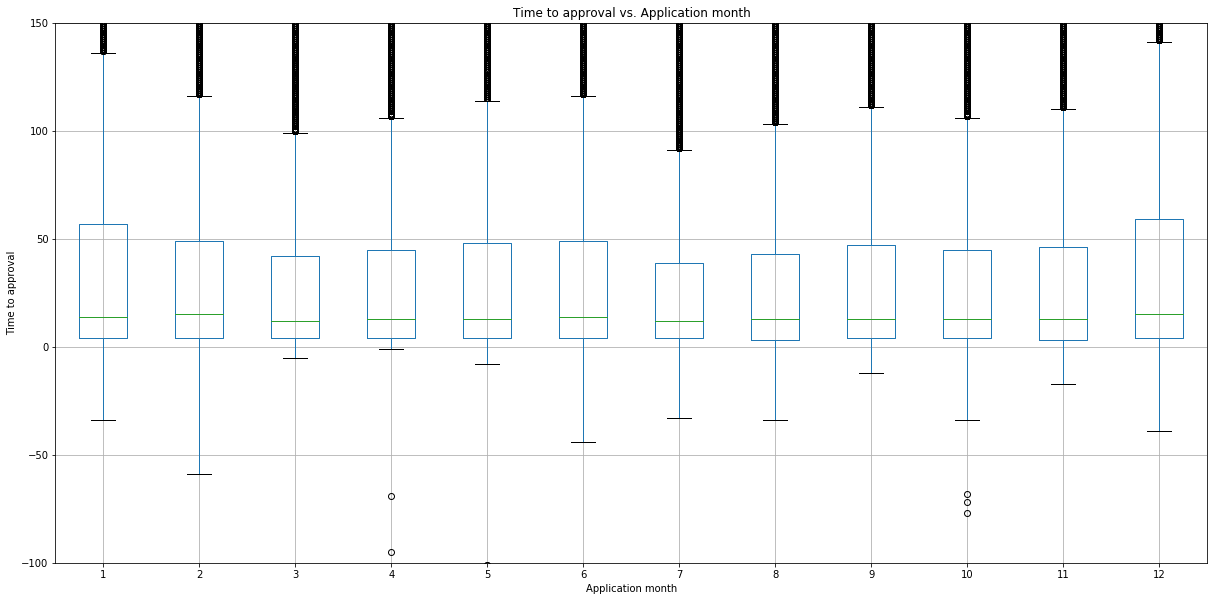

In [49]:
# How many permits are there? (Now defined in initial plots)
# month_proc_time_gb=permit_df[['start_month','processing_time']].groupby(['start_month'], as_index=True)

month_proc_time_df=pd.DataFrame(month_proc_time_gb.mean())

month_proc_time_df=month_proc_time_df.rename(columns={"processing_time": "ave_proc_time"})

# Make a temporary dataframe to hold data where processing time is nonzero.
temp_df=permit_df[['start_month','processing_time']]

temp_df=temp_df[temp_df['processing_time']!=0]

# Create a boxplot to compare means
temp_df.boxplot('processing_time', by='start_month', figsize=(20, 10))

plt.title('Time to approval vs. Application month')
# Remove annoying subtitle
plt.suptitle('')
plt.xlabel('Application month')
plt.ylabel('Time to approval')
plt.ylim((-100,150))
plt.savefig('figures/start_month_proc_time_box_plot.png')

month_proc_time_df

In [ ]:
# Todo ANOVA?

## Second Objective: How does community area affect length to approval?

In [18]:
com_ar_proc_time_gb=permit_df[['community_area','processing_time','total_fee']].groupby(['community_area'], as_index=False)

com_ar_proc_time_df=pd.DataFrame(com_ar_proc_time_gb.mean())

com_ar_proc_time_df=com_ar_proc_time_df.replace({"community_area": community_areas_dict})

com_ar_proc_time_df

# Could do boxplots again.

,community_area,processing_time,total_fee
0,Rogers Park,16.588533,702.037037
1,West Ridge,18.703493,513.088037
2,Uptown,19.788398,1385.773357
3,Lincoln Square,18.527661,698.141973
4,North Center,22.601429,851.260354
...,...,...,...
72,Washington Heights,11.505293,387.615709
73,Mount Greenwood,15.428785,657.808531
74,Morgan Park,11.746343,427.184862
75,Ohare,7.900297,927.898762


In [11]:
# iterating the columns 
for col in permit_df.columns: 
    print(col) 

permit_type
review_type
application_start_date
processing_time
total_fee
reported_cost
community_area
latitude
longitude
location
start_month


In [12]:
permit_df['community_area']

1         30
2         32
3         75
4         32
5         28
          ..
609842    34
609853     8
609854    33
609855    32
609856    36
Name: community_area, Length: 507818, dtype: int32

## Objective 3 How do permits per population in a community area compare for diffenet community areas.  

In [19]:
# Data from https://datahub.cmap.illinois.gov/dataset/2010-census-data-summarized-to-chicago-community-areas

# File to Load (Remember to Change These)
file_to_load = "data/CCASF12010CMAP.csv"

# Read Purchasing File and store into Pandas dataframe
population_data = pd.read_csv(file_to_load)
population_data.head()

,GEOGNAME,GEOGKEYX,P0050001,P0050003,P0050004,P0050005,P0050006,P0050007,P0050008,P0050009,...,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128
0,Geog,GeogKey,Total Population,"Not Hispanic or Latino, White alone","Not Hispanic or Latino, Black or African Ameri...","Not Hispanic or Latino, American Indian and Al...","Not Hispanic or Latino, Asian alone","Not Hispanic or Latino, Native Hawaiian and Ot...","Not Hispanic or Latino, Some Other Race alone","Not Hispanic or Latino, Two or More Races",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rogers Park,1,54991,21618,14461,142,3523,39,202,1573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,West Ridge,2,71942,30706,8015,189,16184,3,225,1919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Uptown,3,56362,29098,11275,191,6414,10,130,1235,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lincoln Square,4,39493,24916,1488,72,4399,11,128,917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
com_ar_ct_df=pd.DataFrame(com_ar_proc_time_gb.count())

com_ar_ct_df['Total Population']=''
for j in range(0,com_ar_ct_df.shape[0]):
    com_ar_ct_df['Total Population'].iloc[j]=population_data['P0050001'].iloc[int(com_ar_ct_df['community_area'].iloc[j])]
com_ar_ct_df['Total Population']=pd.to_numeric(com_ar_ct_df['Total Population'])

com_ar_ct_df['perm_p_person']=(com_ar_ct_df['processing_time']/com_ar_ct_df['Total Population'])

# Apply community area labels
com_ar_ct_df=com_ar_ct_df.replace({"community_area": community_areas_dict})

com_ar_ct_df

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,community_area,processing_time,total_fee,Total Population,perm_p_person
0,Rogers Park,5529,5529,54991,0.100544
1,West Ridge,7015,7015,71942,0.097509
2,Uptown,6947,6947,56362,0.123257
3,Lincoln Square,6923,6923,39493,0.175297
4,North Center,9095,9095,31867,0.285405
...,...,...,...,...,...
72,Washington Heights,4251,4251,26493,0.160457
73,Mount Greenwood,2675,2675,19093,0.140104
74,Morgan Park,3828,3828,22544,0.169801
75,Ohare,6399,6399,12756,0.501646


## Object 4 What is the average permit fee for all projects in a community area?

In [21]:
com_ar_fee_df=pd.DataFrame(com_ar_proc_time_gb.mean())

# Apply community area labels
com_ar_fee_df=com_ar_fee_df.replace({"community_area": community_areas_dict})

com_ar_fee_df

,community_area,processing_time,total_fee
0,Rogers Park,16.588533,702.037037
1,West Ridge,18.703493,513.088037
2,Uptown,19.788398,1385.773357
3,Lincoln Square,18.527661,698.141973
4,North Center,22.601429,851.260354
...,...,...,...
72,Washington Heights,11.505293,387.615709
73,Mount Greenwood,15.428785,657.808531
74,Morgan Park,11.746343,427.184862
75,Ohare,7.900297,927.898762


## Objective 5 Find highest and lowest income Community area.  What is the most common permit in these community areas?

In [22]:
# Data from https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2/data

# File to Load (Remember to Change These)
file_to_load = "data/Per_Capita_Income.csv"

# Read Purchasing File and store into Pandas dataframe
income_data = pd.read_csv(file_to_load)
# Remove empty community number (was for all Chicago)
income_data = income_data[pd.notnull(income_data['Community Area Number'])]

# Change Community Area Numbers to integers.
income_data['Community Area Number']=income_data['Community Area Number'].astype('int')

income_data.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [23]:
for col in income_data.columns: 
    print(col) 

Community Area Number
COMMUNITY AREA NAME
PERCENT OF HOUSING CROWDED
PERCENT HOUSEHOLDS BELOW POVERTY
PERCENT AGED 16+ UNEMPLOYED
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA
PERCENT AGED UNDER 18 OR OVER 64
PER CAPITA INCOME 
HARDSHIP INDEX


In [24]:
max_index=income_data['PER CAPITA INCOME '].idxmax()
min_index=(-income_data['PER CAPITA INCOME ']).idxmax()
print(f'Highest per capita income in {community_areas_dict[max_index]}, community number {max_index}.')
print(f'Lowest per capita income in {community_areas_dict[min_index]}, community number {min_index}.')

Highest per capita income in Lincoln Park, community number 7.
Lowest per capita income in West Pullman, community number 53.


In [50]:
# Find proportions of permit types in high income community area

high_inc_gb=permit_df[permit_df['community_area']==max_index][['permit_type','community_area']].groupby(['permit_type'], as_index=False)

high_inc_df=pd.DataFrame(high_inc_gb.count())

high_inc_df=high_inc_df.sort_values(by=['community_area'], ascending=False)

high_inc_df=high_inc_df.rename(columns={'community_area': 'high_proportion'})

high_inc_total=high_inc_df['high_proportion'].sum()

high_inc_df['high_proportion']=high_inc_df['high_proportion']/high_inc_total

high_inc_df

,permit_type,high_proportion
1,ELECTRIC WIRING,0.328743
0,EASY PERMIT PROCESS,0.252074
5,RENOVATION/ALTERATION,0.189653
7,SIGNS,0.078052
3,NEW CONSTRUCTION,0.054498
8,WRECKING/DEMOLITION,0.039398
2,ELEVATOR EQUIPMENT,0.034400
6,SCAFFOLDING,0.016482
4,REINSTATE REVOKED PMT,0.006699


In [51]:
# Find proportions of permit types in low income community area

low_inc_gb=permit_df[permit_df['community_area']==min_index][['permit_type','community_area']].groupby(['permit_type'], as_index=False)

low_inc_df=pd.DataFrame(low_inc_gb.count())

low_inc_df=low_inc_df.sort_values(by=['community_area'], ascending=False)

low_inc_df=low_inc_df.rename(columns={'community_area': 'low_proportion'})

low_inc_total=low_inc_df['low_proportion'].sum()

low_inc_df['low_proportion']=low_inc_df['low_proportion']/low_inc_total

low_inc_df

,permit_type,low_proportion
1,ELECTRIC WIRING,0.389313
0,EASY PERMIT PROCESS,0.350429
5,RENOVATION/ALTERATION,0.103769
8,WRECKING/DEMOLITION,0.094466
7,SIGNS,0.021708
2,ELEVATOR EQUIPMENT,0.019800
3,NEW CONSTRUCTION,0.017653
4,REINSTATE REVOKED PMT,0.002147
6,SCAFFOLDING,0.000716


In [52]:
# Merge data for low and high income


high_low_df=pd.merge(high_inc_df, low_inc_df, on='permit_type')

high_low_df.to_csv('plot_data/high_low_income_permit_type_proportions.csv', index=False)

high_low_df

,permit_type,high_proportion,low_proportion
0,ELECTRIC WIRING,0.328743,0.389313
1,EASY PERMIT PROCESS,0.252074,0.350429
2,RENOVATION/ALTERATION,0.189653,0.103769
3,SIGNS,0.078052,0.021708
4,NEW CONSTRUCTION,0.054498,0.017653
5,WRECKING/DEMOLITION,0.039398,0.094466
6,ELEVATOR EQUIPMENT,0.034400,0.019800
7,SCAFFOLDING,0.016482,0.000716
8,REINSTATE REVOKED PMT,0.006699,0.002147


## What location paid the most permit fees?  (in each community area)

In [33]:
# Takes a long time to run

#com_area_indexes=pd.to_numeric(permit_df['community_area'].dropna()).tolist()

#com_area_indexes=[int(index) for index in com_area_indexes]

com_area_indexes=permit_df['community_area'].tolist()

max_indicies=[permit_df[(permit_df['community_area']==index)]['total_fee'].idxmax() for index in com_area_indexes]



KeyboardInterrupt: 

In [ ]:
# Create data frame to store information on highest permit fee locations and populate it.
max_fee_loc_df = pd.DataFrame(columns=['community_area','total_fee','latitude','longitude'])                      
i = 0
for j in max_indicies:
    max_fee_loc_df.loc[i]=[permit_df['community_area'][j],
                           permit_df['total_fee'][j],
                           permit_df['latitude'][j],
                           permit_df['longitude'][j]]
    i+=1
    
# Apply community area labels
max_fee_loc_df=max_fee_loc_df.replace({"community_area": community_areas_dict})

max_fee_loc_df

In [ ]:
per_type_gb=permit_df[['permit_type','processing_time','total_fee']].groupby(['permit_type'], as_index=False)

per_type_sum_df=pd.DataFrame(per_type_gb.sum())

per_type_sum_df

In [153]:
per_type_ct_df=pd.DataFrame(per_type_gb.count())

per_type_ct_df

,permit_type,processing_time,total_fee
0,PERMIT - EASY PERMIT PROCESS,235,235
1,PERMIT - ELECTRIC WIRING,133,133
2,PERMIT - ELEVATOR EQUIPMENT,20,20
3,PERMIT - NEW CONSTRUCTION,39,39
4,PERMIT - PORCH CONSTRUCTION,1,1
5,PERMIT - REINSTATE REVOKED PMT,12,12
6,PERMIT - RENOVATION/ALTERATION,448,448
7,PERMIT - SCAFFOLDING,7,7
8,PERMIT - SIGNS,59,59
9,PERMIT - WRECKING/DEMOLITION,15,15


In [ ]:
per_type_mth_gb=permit_df[['permit_type','start_month','processing_time','total_fee']].groupby([
    'permit_type','start_month'], as_index=False)

per_type_mth_ct_df=pd.DataFrame(per_type_mth_gb.count())

per_type_mth_ct_df[per_type_mth_ct_df['permit_type']=='PERMIT - EASY PERMIT PROCESS']

In [ ]:

per_type_mth_ct_df[per_type_mth_ct_df['permit_type']=='PERMIT - RENOVATION/ALTERATION']